<a href="https://colab.research.google.com/github/moondabae/breast-cancer/blob/main/Finalize_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown 1A9GeHfvLM9aTBd21vYYUWPDBFxHcyEo7

Downloading...
From: https://drive.google.com/uc?id=1A9GeHfvLM9aTBd21vYYUWPDBFxHcyEo7
To: /content/breast class.zip
100% 5.53G/5.53G [00:35<00:00, 154MB/s]


In [ ]:
!unzip "breast class.zip"

Archive:  breast class.zip
replace breast class/train/Grade 1/10a.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: breast class/train/Grade 1/10a.tif  
  inflating: breast class/train/Grade 1/11a.tif  
  inflating: breast class/train/Grade 1/12a.tif  
  inflating: breast class/train/Grade 1/13a.tif  
  inflating: breast class/train/Grade 1/14a.tif  
  inflating: breast class/train/Grade 1/15a.tif  
  inflating: breast class/train/Grade 1/16a.tif  
  inflating: breast class/train/Grade 1/17a.tif  
  inflating: breast class/train/Grade 1/18a.tif  
  inflating: breast class/train/Grade 1/19a.tif  
  inflating: breast class/train/Grade 1/1a.tif  
  inflating: breast class/train/Grade 1/20a.tif  
  inflating: breast class/train/Grade 1/21a.tif  
  inflating: breast class/train/Grade 1/22a.tif  
  inflating: breast class/train/Grade 1/23a.tif  
  inflating: breast class/train/Grade 1/24a.tif  
  inflating: breast class/train/Grade 1/25a.tif  
  inflating: breast class/train/Grade 1/

In [ ]:
#Input Dataset
base_dir = '/content/breast class'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Used Categorical class mode
# Flow validation images in batches of 8 and train in batches of 32
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, class_mode = 'categorical', target_size = (224, 224), shuffle=False, classes={'Grade 1': 0, 'Grade 2': 1,'Grade 3': 2})
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 8, class_mode = 'categorical', target_size = (224, 224), shuffle=False, classes={'Grade 1': 0, 'Grade 2': 1,'Grade 3': 2})

Found 119 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [ ]:
#Add VGG16 into Base Model
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False,
weights = 'imagenet')
base_model.trainable = False

In [ ]:
num_class = 3
# Created Sequential Model
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())

# Flatten the output layer to 1 dimension
model.add(tf.keras.layers.Flatten())

# Add a fully connected layer with 512 hidden units and ReLU activation
model.add(tf.keras.layers.Dense(512, activation='relu'))

# Add a dropout rate of 0.5
model.add(tf.keras.layers.Dropout(0.5))

# Add a final softmax layer with 3 node for classification output
model.add(tf.keras.layers.Dense(num_class, activation='softmax'))

In [ ]:
#Compile with optimizer Adam with LN=0.0005 with categorical_crossentropy for loss
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
#train and store the data of machine learning into variable vgghist for graph later on
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = len(train_generator), epochs = 30, verbose = 1)

Epoch 1/30
4/4 [==============================] - 101s 26s/step - loss: 8.1821 - acc: 0.2353 - val_loss: 3.6183 - val_acc: 0.3333
Epoch 2/30
4/4 [==============================] - 96s 25s/step - loss: 3.9026 - acc: 0.4874 - val_loss: 3.0192 - val_acc: 0.3778
Epoch 3/30
4/4 [==============================] - 99s 26s/step - loss: 3.6969 - acc: 0.4202 - val_loss: 2.6601 - val_acc: 0.3333
Epoch 4/30
4/4 [==============================] - 94s 27s/step - loss: 3.7947 - acc: 0.3950 - val_loss: 2.6621 - val_acc: 0.3556
Epoch 5/30
4/4 [==============================] - 93s 25s/step - loss: 3.6980 - acc: 0.4202 - val_loss: 3.2608 - val_acc: 0.4444
Epoch 6/30
4/4 [==============================] - 99s 27s/step - loss: 3.1058 - acc: 0.5126 - val_loss: 2.0740 - val_acc: 0.4667
Epoch 7/30
4/4 [==============================] - 91s 24s/step - loss: 2.4142 - acc: 0.5798 - val_loss: 2.0825 - val_acc: 0.4667
Epoch 8/30
4/4 [==============================] - 89s 23s/step - loss: 2.3515 - acc: 0.5882 - va

In [ ]:
#Graph of accuracy for both training and validation

acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

NameError: ignored

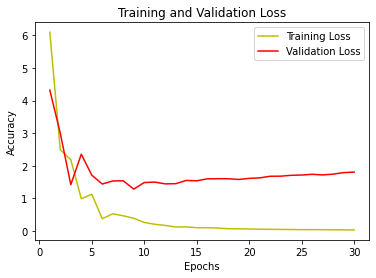

In [ ]:
#Graph of loss for both training and validation

loss = vgghist.history['loss']
loss_acc = vgghist.history['val_loss']
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, loss_acc, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Graph for loss and accuracy for both training and validation

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=vgghist.history['val_loss'], name="Validation loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=vgghist.history['loss'], name="Loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=vgghist.history['val_acc'], name="Validation accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=vgghist.history['acc'], name="Accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Accuracy and Loss "
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b></b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b></b> Accuracy", secondary_y=True)

fig.show()